<a href="https://colab.research.google.com/github/saranshsinhaa/ai-lab/blob/main/exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classifier Accuracy: 0.0
Color assignment:
Node A: Color A
Node B: Color D
Node C: Color C
Node D: Color D
Node E: Color A


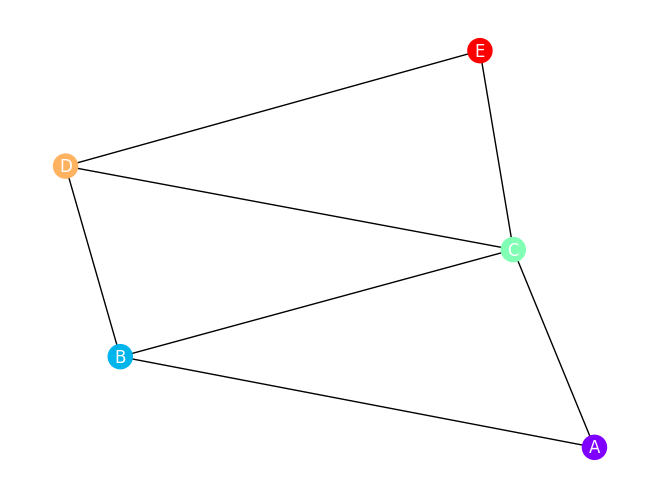

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class GraphColoringMLAgent:
    def __init__(self, graph):
        self.graph = graph
        self.features, self.labels = self.generate_features_labels()

    def generate_features_labels(self):
        features = []
        labels = []

        for node in self.graph:
            feature = [len(self.graph[node])]  # Feature: Degree of the node
            label = node  # Label: Node identifier

            features.append(feature)
            labels.append(label)

        return np.array(features), np.array(labels)

    def train_classifier(self):
        X_train, X_test, y_train, y_test = train_test_split(self.features, self.labels, test_size=0.2, random_state=42)

        classifier = RandomForestClassifier(n_estimators=10, random_state=42)
        classifier.fit(X_train, y_train)

        # Predict node labels
        predicted_labels = classifier.predict(X_test)

        # Evaluate the classifier accuracy
        accuracy = accuracy_score(y_test, predicted_labels)
        print(f"Classifier Accuracy: {accuracy}")

        return classifier

    def color_graph(self, trained_classifier):
        node_colors = {node: trained_classifier.predict(np.array([[len(self.graph[node])]]))[0] for node in self.graph}
        return node_colors

# Example graph represented as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D', 'E'],
    'D': ['B', 'C', 'E'],
    'E': ['C', 'D']
}

# Instantiate the ML graph coloring agent
ml_coloring_agent = GraphColoringMLAgent(graph)

# Train the classifier
classifier = ml_coloring_agent.train_classifier()

# Color the graph using the trained classifier
color_assignment = ml_coloring_agent.color_graph(classifier)

# Output color assignment
print("Color assignment:")
for node, color in color_assignment.items():
    print(f"Node {node}: Color {color}")

# Visualization of the graph with node colors
G = nx.Graph(graph)
pos = nx.spring_layout(G)

# Convert node labels to numeric values for proper coloring
numeric_labels = {node: i for i, node in enumerate(G.nodes())}
node_colors = [numeric_labels[node] for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, font_color='white')

plt.show()










